# OBJECTIVE #

1.   <b>APPLYING RANDOM FOREST WITH BOW VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES 
  


In [0]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier


In [20]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [22]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [0]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.3,shuffle=False)

In [92]:
vectorizer=CountVectorizer(min_df=2)#building the vertorizer with word counts equal and more then 2
train_bow=vectorizer.fit_transform(x_train)#fitting the model on training data
print(train_bow.shape)


(70000, 16382)


In [93]:
test_bow=vectorizer.transform(x_test)#fitting the bow model on test data
print("shape of x_test after bow vectorization ",test_bow.shape)

shape of x_test after bow vectorization  (30000, 16382)


In [94]:
#biudling the model
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
rf=RandomForestClassifier(criterion='gini',class_weight={1:.5,0:.5})
tuned_parameters=[{'max_depth':[61,64,68,73,77,80],'n_estimators':[21,30,35,40,45,50]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(rf, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [95]:
%%time
model.fit(train_bow, y_train)#fiitting the training data


CPU times: user 18.7 s, sys: 208 ms, total: 18.9 s
Wall time: 25min 2s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [61, 64, 68, 73, 77, 80], 'n_estimators': [21, 30, 35, 40, 45, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [96]:
print(model.best_estimator_)#printing the best_estimator

RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=77, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=35, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [106]:
print(model.score(test_bow,y_test))#checking the score on test_Data 

0.9380587825900744


In [107]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,7.693781,0.126196,0.943111,0.970668,61,21,"{'max_depth': 61, 'n_estimators': 21}",23,0.947864,0.974978,...,0.943715,0.968620,0.944578,0.969933,0.937165,0.967610,3.882113,0.006098,0.003500,0.002646
1,10.929001,0.169017,0.942684,0.969995,61,30,"{'max_depth': 61, 'n_estimators': 30}",33,0.947259,0.972694,...,0.944063,0.970623,0.943839,0.968420,0.936595,0.966945,5.505491,0.007266,0.003529,0.002057
2,12.851338,0.198344,0.942826,0.970563,61,35,"{'max_depth': 61, 'n_estimators': 35}",30,0.947064,0.973561,...,0.944197,0.969915,0.944856,0.969323,0.936044,0.968746,6.558163,0.008702,0.003760,0.001717
3,14.822200,0.223285,0.942867,0.970194,61,40,"{'max_depth': 61, 'n_estimators': 40}",28,0.947383,0.973196,...,0.943730,0.968981,0.944752,0.969266,0.937589,0.968620,7.465313,0.010184,0.003361,0.001693
4,16.404032,0.246995,0.942496,0.970630,61,45,"{'max_depth': 61, 'n_estimators': 45}",35,0.946959,0.973515,...,0.943993,0.969779,0.943857,0.969368,0.936049,0.968313,8.369952,0.013537,0.003642,0.001918
5,18.451207,0.272454,0.942391,0.970166,61,50,"{'max_depth': 61, 'n_estimators': 50}",36,0.946693,0.971830,...,0.943436,0.971485,0.944066,0.968409,0.936521,0.968449,9.389289,0.013869,0.003411,0.001469
6,8.061914,0.127674,0.942987,0.971677,64,21,"{'max_depth': 64, 'n_estimators': 21}",26,0.946964,0.974566,...,0.944020,0.971212,0.944571,0.969696,0.937110,0.969740,4.088307,0.005346,0.003300,0.001922
7,11.573845,0.175007,0.942734,0.971318,64,30,"{'max_depth': 64, 'n_estimators': 30}",32,0.947487,0.973424,...,0.943602,0.969688,0.944101,0.970329,0.936509,0.970247,6.048024,0.010885,0.003593,0.001531
8,13.473842,0.201682,0.942827,0.972150,64,35,"{'max_depth': 64, 'n_estimators': 35}",29,0.947221,0.974978,...,0.944154,0.971681,0.944535,0.970986,0.936736,0.970066,6.850748,0.009691,0.003546,0.001715
9,15.423412,0.228173,0.943077,0.972066,64,40,"{'max_depth': 64, 'n_estimators': 40}",24,0.946788,0.974337,...,0.943887,0.971984,0.945258,0.970669,0.938002,0.970917,7.907022,0.011021,0.003085,0.001309


In [0]:

results['mean_test_score']=results['mean_test_score']*100 #multiplying mean_test_score by 100

In [0]:
results=results.round(decimals=2)# rounding off to 2 decimal places
results['cv_error_score']=100-results['mean_test_score']# generating a new colum for getting cv_Errorscores and using it in pivottable

# PLOTTING THE HEATMAP WITH  HYPERPARAMETERS FOR CV_ERROR SCORE 

In [0]:
test_score_heatmap=results.pivot(	'param_max_depth'	,'param_n_estimators','cv_error_score'	)

In [112]:
test_score_heatmap

param_n_estimators,21,30,35,40,45,50
param_max_depth,,,,,,
61,5.69,5.73,5.72,5.71,5.75,5.76
64,5.70,5.73,5.72,5.69,5.72,5.75
68,5.68,5.69,5.69,5.69,5.70,5.71
73,5.64,5.66,5.68,5.69,5.67,5.67
77,5.61,5.63,5.60,5.63,5.67,5.68
80,5.60,5.63,5.66,5.65,5.66,5.61


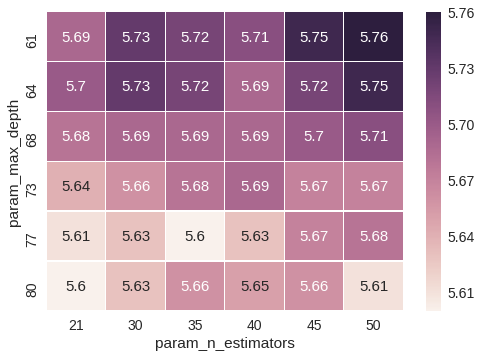

In [113]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [114]:
print(model.best_estimator_)#printing the best_estimator

RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=77, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=35, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=77 AND MIN_SAMPLE_SPLIT=35

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

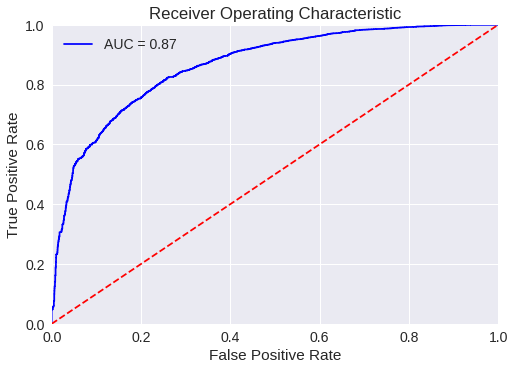

In [116]:
rf=RandomForestClassifier(criterion='gini',class_weight={1:.5,0:.5},max_depth=77 ,n_estimators=35)
rf.fit(train_bow,y_train)#fitting the model 
probs = rf.predict_proba(test_bow)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
print('accuracy from the ROC curve is found as ',roc_auc*100)

accuracy from the ROC curve is found as  86.5744784708663


In [118]:
z=rf.feature_importances_
a=z.argsort()
print('shape of wieght vector is:',a.shape)
top_features=np.take(vectorizer.get_feature_names(),a[16360:])#taking last features as they are of very high importance 

shape of wieght vector is: (16382,)


In [119]:
print(top_features)#printing the top_features
top=list(top_features)

['product' 'unfortun' 'good' 'wors' 'tast' 'delici' 'bad' 'mayb' 'money'
 'would' 'receiv' 'refund' 'horribl' 'return' 'worst' 'best' 'threw'
 'terribl' 'love' 'aw' 'great' 'disappoint']


# REPRESENTING TOP IMPORTANT FEATURES USING WORDCLOUD LIBRARY

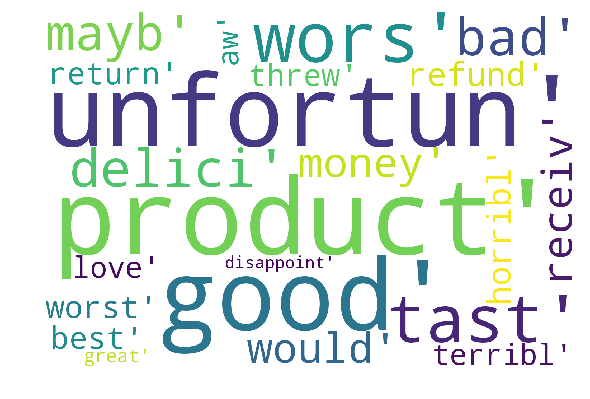

In [120]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(top)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 88.440%
Precision on test set: 0.884
Recall on test set: 1.000
F1-Score on test set: 0.938
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



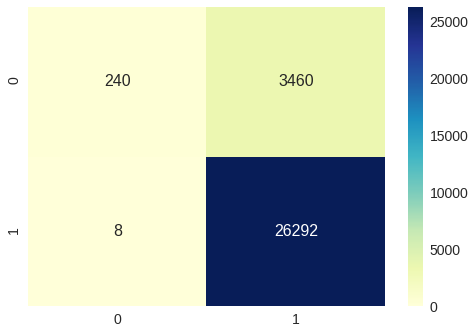

In [121]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
#building the model
y_pred = rf.predict(test_bow) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap="YlGnBu")


# BOW VECTORIZATION FOR RANDOM  FOREST IS COMPLETED 

# OBJECTIVE #

1.   <b>APPLYING GBDT WITH BOW VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES 
  


In [79]:
from xgboost import XGBClassifier
#biudling the model
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
xg=XGBClassifier(n_jobs=-1)
tuned_parameters=[{'max_depth':[11,15,20,24,27,30],'n_estimators':[21,30,35,40,45,50]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(xg, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [81]:
%%time
model.fit(train_bow, y_train)#fiitting the training data


CPU times: user 1min 37s, sys: 379 ms, total: 1min 38s
Wall time: 46min 2s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [11, 15, 20, 24, 27, 30], 'n_estimators': [21, 30, 35, 40, 45, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [82]:
print(model.best_estimator_)#printing the best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=27, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [83]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,8.378044,0.223508,0.945871,0.957951,11,21,"{'max_depth': 11, 'n_estimators': 21}",36,0.949664,0.960068,...,0.946649,0.956935,0.946241,0.957558,0.941276,0.956715,3.601786,0.011164,0.002697,0.001223
1,11.744793,0.234820,0.946986,0.960688,11,30,"{'max_depth': 11, 'n_estimators': 30}",35,0.950655,0.963362,...,0.947394,0.959732,0.947174,0.959922,0.942828,0.959056,5.067356,0.010299,0.002488,0.001535
2,13.630929,0.243391,0.947529,0.962423,11,35,"{'max_depth': 11, 'n_estimators': 35}",33,0.951012,0.965249,...,0.947545,0.961596,0.947766,0.961618,0.943720,0.960904,5.794263,0.009017,0.002311,0.001532
3,15.404321,0.254485,0.948213,0.963805,11,40,"{'max_depth': 11, 'n_estimators': 40}",28,0.951388,0.966870,...,0.948178,0.962895,0.948930,0.962878,0.944736,0.962146,6.544451,0.011410,0.002137,0.001674
4,17.146619,0.261241,0.948735,0.965392,11,45,"{'max_depth': 11, 'n_estimators': 45}",25,0.951646,0.968258,...,0.948748,0.964550,0.949698,0.964577,0.945313,0.963654,7.307159,0.009651,0.002065,0.001605
5,19.081864,0.270164,0.949192,0.967105,11,50,"{'max_depth': 11, 'n_estimators': 50}",23,0.952179,0.970168,...,0.949823,0.966382,0.950167,0.966183,0.945503,0.965247,8.160128,0.012240,0.002223,0.001697
6,11.781351,0.240545,0.947026,0.963850,15,21,"{'max_depth': 15, 'n_estimators': 21}",34,0.950639,0.966308,...,0.947149,0.962917,0.947804,0.963104,0.943503,0.962175,5.098673,0.010658,0.002326,0.001488
7,16.268544,0.254496,0.948179,0.967263,15,30,"{'max_depth': 15, 'n_estimators': 30}",29,0.951573,0.970128,...,0.948847,0.966543,0.949698,0.966237,0.944107,0.965759,7.194571,0.013137,0.002574,0.001561
8,18.858186,0.269509,0.948571,0.969465,15,35,"{'max_depth': 15, 'n_estimators': 35}",26,0.951885,0.972525,...,0.948999,0.968870,0.949877,0.968043,0.944260,0.967558,8.291486,0.017387,0.002530,0.001796
9,21.280204,0.278331,0.949295,0.971127,15,40,"{'max_depth': 15, 'n_estimators': 40}",22,0.952350,0.973892,...,0.949779,0.970429,0.950489,0.970110,0.945653,0.969254,9.371412,0.015838,0.002256,0.001634


In [0]:
results['mean_test_score']=results['mean_test_score']*100

results=results.round(decimals=2)

results['cv_error_score']=100-results['mean_test_score']



# PLOTTING THE HEATMAP WITH HYPERPARAMETERS FOR CV_ERROR SCORE

In [85]:

test_score_heatmap=results.pivot( 'param_max_depth' ,'param_n_estimators','cv_error_score'  )

test_score_heatmap


param_n_estimators,21,30,35,40,45,50
param_max_depth,,,,,,
11,5.41,5.30,5.25,5.18,5.13,5.08
15,5.30,5.18,5.14,5.07,5.02,4.97
20,5.21,5.11,5.02,4.91,4.88,4.83
24,5.18,5.06,4.99,4.90,4.85,4.81
27,5.15,5.02,4.94,4.87,4.80,4.76
30,5.18,5.02,4.97,4.89,4.88,4.86


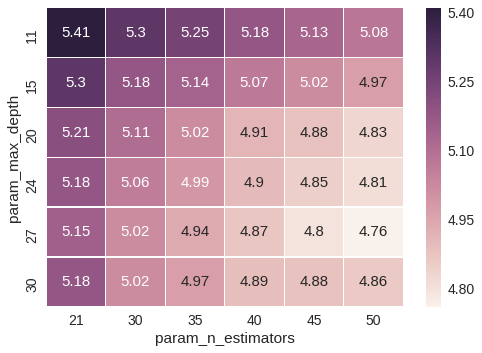

In [86]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [87]:
print(model.best_estimator_)#printing the best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=27, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=27 AND N_ESTIMATORS=50

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

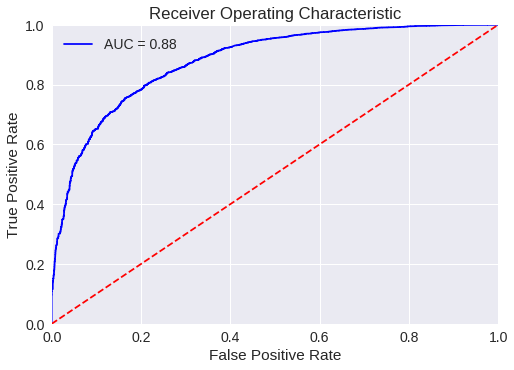

In [131]:
xg=XGBClassifier(n_jobs=-1,max_depth=27 ,n_estimators=50)
xg.fit(train_bow,y_train)#fitting the model 
probs = xg.predict_proba(test_bow)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [132]:
print('accuracy from the ROC curve is found as ',roc_auc*100)

accuracy from the ROC curve is found as  87.99880639194328


In [125]:
z=rf.feature_importances_
a=z.argsort()
print('shape of wieght vector is:',a.shape)
top_features=np.take(vectorizer.get_feature_names(),a[16360:])#taking last features as they are of very high importance 

shape of wieght vector is: (16382,)


In [126]:
print(top_features)#printing the top_features
top=list(top_features)

['product' 'unfortun' 'good' 'wors' 'tast' 'delici' 'bad' 'mayb' 'money'
 'would' 'receiv' 'refund' 'horribl' 'return' 'worst' 'best' 'threw'
 'terribl' 'love' 'aw' 'great' 'disappoint']


# REPRESENTING TOP IMPORTANT FEATURES USING WORDCLOUD LIBRARY

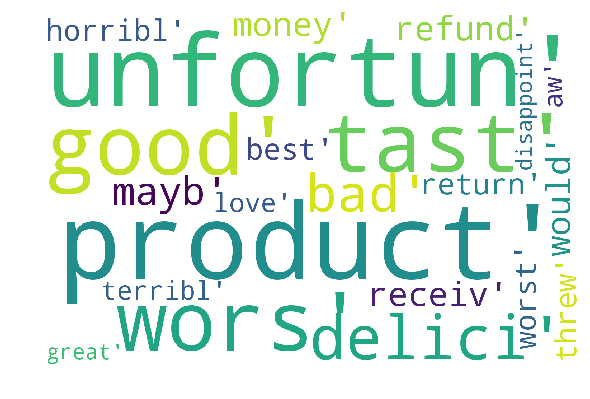

In [127]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(top)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Accuracy on test set: 90.103%
Precision on test set: 0.907
Recall on test set: 0.988
F1-Score on test set: 0.946
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



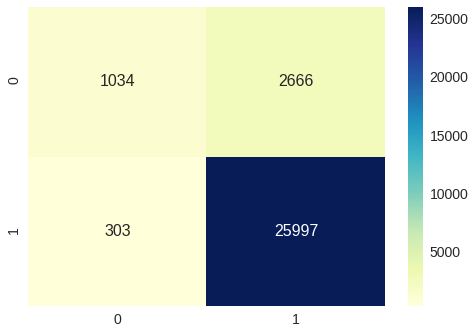

In [133]:

y_pred = xg.predict(test_bow)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap="YlGnBu")
